In [44]:
import os
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import cv2
import random
import shutil
from PIL import Image

In [45]:

train_labels_loc = r"C:\Users\sanij\OneDrive\Documents\Cours_3A\Projet-image\DataCadot\labels\train"
test_labels_loc  = r"C:\Users\sanij\OneDrive\Documents\Cours_3A\Projet-image\DataCadot\labels\valid"

def get_labels(path):
    labels = []
    for root, _, files in os.walk(path):
        for file in files:
            file_path = os.path.join(root, file)
            L = []
            with open(file_path, 'r') as f:
                for line in f:
                    parts = line.split()
                    if parts:
                        L.append(parts[0])
            labels.append(L)
    return labels

y_train_labels = get_labels(train_labels_loc)


In [46]:
print(y_train_labels)

[['1', '10', '10', '1', '10', '10', '1', '10', '1', '1', '1', '1', '10', '1', '6', '6', '1'], ['1', '1', '10', '1', '10', '1', '6', '1', '5', '1', '1'], ['1', '1', '1', '10', '10', '10', '10', '1', '1', '1', '10', '10', '10', '10', '1', '10', '10', '1', '10', '1', '1', '1', '1', '1'], ['1', '1', '1', '1', '10', '1', '10', '1', '1', '1', '1', '1'], ['1', '1', '1', '1', '1', '1', '1', '1', '10', '10', '1', '1', '1', '1', '1', '1', '1', '10', '1', '10', '1', '10', '1'], ['1', '1', '1', '1', '1', '1', '1', '10', '1'], ['1', '1', '1', '1', '1', '1', '1', '1', '1', '10', '1', '10', '10', '1', '10', '10', '1', '10', '10', '10', '10', '2', '2', '1', '1', '1'], ['1', '1', '1', '1', '10', '1', '1', '10', '1', '1', '1', '1', '1', '1'], ['1', '1', '10', '10', '1', '10', '10', '1', '10', '6', '10', '10', '2', '10', '1', '1', '6', '1', '10', '1', '1', '1', '1', '10', '10', '1', '1', '10'], ['10', '10', '1', '1', '1', '1', '6', '1', '10', '2', '10'], ['3', '3'], ['1', '10', '10', '1', '6'], ['1', '1'

In [47]:
classes_majority = ['1','10']
nb=len(y_train_labels)

In [48]:
sousrep=[]
surrep=[]
for i in range (nb):
    countmin=0
    countmaj=0  
    for j in range (len(y_train_labels[i])):
        if y_train_labels[i][j] in classes_majority:
                countmaj+=1
        else:
                countmin+=1

    if countmaj*100/len(y_train_labels[i]) > 80:
        sousrep.append(i)

    if countmin*100/len(y_train_labels[i]) > 90:
        surrep.append(i)
        


print("Il y a ", len(sousrep), "images sous-representant les classes minoritaires sur un total de ", nb, " images")
#print(sousrep)
print(len(surrep), " images sur-representant les classes minoritaires")

Il y a  2421 images sous-representant les classes minoritaires sur un total de  3234  images
45  images sur-representant les classes minoritaires


# Partie Data augmentation

In [49]:
class_name = {
 0 : "Basketball Field",
 1 : "Building",
 2 : "Crosswalk",
 3 : "Football Field",
 4 : "Graveyard",
 5 : "Large Vehicule",
 6 : "Medium Vehicule",
 7 : "Playground",
 8 : "Roundabout",
 9 : "Ship",
 10 : "Small Vehicule",
 11 : "Swimming Pool",
 12 : "Tennis Court",
 13 : "Train"
}

In [50]:
train_img_loc = r"C:\Users\sanij\OneDrive\Documents\Cours_3A\Projet-image\DataCadot\images\train"
test_img_loc  = r"C:\Users\sanij\OneDrive\Documents\Cours_3A\Projet-image\DataCadot\images\valid"

In [51]:
def build_train_bis(train_img_loc, train_labels_loc):
    train_bis_img = os.path.join(os.path.dirname(train_img_loc), "train_bis")
    train_bis_labels = os.path.join(os.path.dirname(train_labels_loc), "train_bis")

    if os.path.exists(train_bis_img):
        shutil.rmtree(train_bis_img)
    if os.path.exists(train_bis_labels):
        shutil.rmtree(train_bis_labels)

    os.makedirs(train_bis_img)
    os.makedirs(train_bis_labels)

    count_img = 0
    for f in sorted(os.listdir(train_img_loc)):
        src = os.path.join(train_img_loc, f)
        dst = os.path.join(train_bis_img, f)
        if os.path.isfile(src):
            shutil.copy(src, dst)
            count_img += 1

    count_label = 0
    for f in sorted(os.listdir(train_labels_loc)):
        src = os.path.join(train_labels_loc, f)
        dst = os.path.join(train_bis_labels, f)
        if os.path.isfile(src):
            shutil.copy(src, dst)
            count_label += 1

    return count_img, count_label


In [52]:
build_train_bis(train_img_loc,train_labels_loc)

(3234, 3234)

In [53]:
train_bis_img_loc= r"C:\Users\sanij\OneDrive\Documents\Cours_3A\Projet-image\DataCadot\images\train_bis"
train_bis_label_loc= r"C:\Users\sanij\OneDrive\Documents\Cours_3A\Projet-image\DataCadot\labels\train_bis"

In [54]:
def plot(path, i):
    files = sorted(os.listdir(path))
    if i >= len(files):
        print("Index hors limite :", i)
        return None
    
    print("Chargement de l'image :", files[i])

    file_path = os.path.join(path, files[i])
    img = cv2.imread(file_path)
    
    if img is None:
        print("Erreur chargement :", file_path)
    return img


In [55]:
img=plot(train_img_loc,sousrep[3])

Chargement de l'image : 75-2021-0640-6860-LA93-0M20-E080-1020_jpeg_jpg.rf.8164f56c3efb27fd13d052a6847df54a.jpg


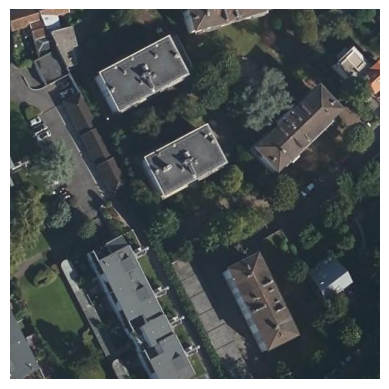

In [56]:
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [57]:
# Fonction qui permet de dessiner les boîtes englobantes sur une image + les labels associés
def reconnaissance_classes(path,i,image) :
    files = sorted(os.listdir(path))
    label_file = os.path.join(path, files[i])
    data = []
    with open(label_file, "r") as f:
        for ligne in f:
            valeurs = ligne.strip().split()
            data.append(valeurs)
#---------------------------------------------------------------------------------
    largeur_img = img.shape[1] # img.shape[0] =img.shape[1]
    classid_list, xc_list, yc_list, w_list, h_list = [],[],[],[],[]
    for i in range(len(data)):
        classid, xc, yc, w, h = map(float, data[i][0:5]) # xc,yc,w,h sont les coordonnées YOLO normalisées
        classid_list.append(classid), xc_list.append(xc*largeur_img), yc_list.append(yc*largeur_img), w_list.append(w*largeur_img), h_list.append(h*largeur_img)
#---------------------------------------------------------------------------------

    for i in range(len(data)):
        x1,x2,y1,y2 = int(xc_list[i] -w_list[i]/2), int(xc_list[i] + h_list[i]/2), int(yc_list[i] - w_list[i]/2), int(yc_list[i] + h_list[i]/2)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 1)
        label = class_name[int(classid_list[i])]
        cv2.putText(img, label, (x1, y1-5),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)
    return img

 #---------------------------------------------------------------------------------

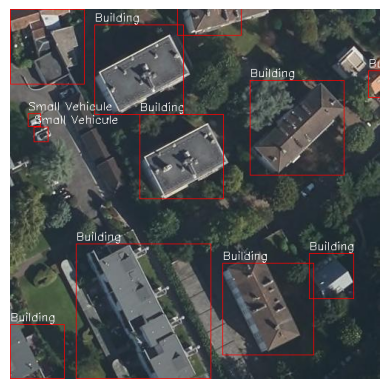

In [58]:
img=reconnaissance_classes(train_labels_loc,sousrep[3],img)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

In [59]:
# Fonction de suppression d'un nombre donné d'images sur representant les classes majoritaires
def remove_images(train_img_loc, sousrep,prop):
    files = sorted(os.listdir(train_img_loc))
    n = int(prop * len(sousrep))
    remove_ids = random.sample(sousrep, n)

    for idx in remove_ids:
        img_path = os.path.join(train_img_loc, files[idx]) 
        if os.path.exists(img_path):
            os.remove(img_path)
    return len(remove_ids)

In [60]:
def remove_images_and_labels(train_img_loc, train_labels_loc, sousrep, prop):
    img_files = sorted(os.listdir(train_img_loc))
    label_files = sorted(os.listdir(train_labels_loc))
    n = int(prop * len(sousrep))
    remove_ids = random.sample(sousrep, n)
    removed_img = 0
    removed_lbl = 0

    for idx in remove_ids:
        if idx < 0 or idx >= len(img_files):
            continue
        img_path = os.path.join(train_img_loc, img_files[idx])
        lbl_path = os.path.join(train_labels_loc, label_files[idx])
        if os.path.exists(img_path):
            os.remove(img_path)
            removed_img += 1
        if os.path.exists(lbl_path):
            os.remove(lbl_path)
            removed_lbl += 1
    return removed_img, removed_lbl


In [61]:
int(0.8 * len(sousrep))

1936

In [62]:
remove_images_and_labels(train_bis_img_loc, train_bis_label_loc, sousrep, 1) # A utiliser qu'une fois

(2421, 2421)

In [63]:
# Fonction d'augmentation d'images par rotation et flips
def data_aug(train_img_loc, surrep, nb):
    files = sorted(os.listdir(train_img_loc))
    count = 0

    for idx in surrep:
        if idx < 0 or idx >= len(files):
            continue

        img_path = os.path.join(train_img_loc, files[idx])
        if not os.path.exists(img_path):
            continue

        img = Image.open(img_path)
        base, ext = os.path.splitext(files[idx])
        if ext == "":
            ext = ".png"

        for i in range(nb):
            aug = img.copy()

            # rotation aléatoire
            angle = random.choice([0,90, 180,270])
            aug = aug.rotate(angle, expand=True)

            # flips aléatoires
            if random.random() < 0.5:
                aug = aug.transpose(Image.FLIP_LEFT_RIGHT)
            if random.random() < 0.5:
                aug = aug.transpose(Image.FLIP_TOP_BOTTOM)

            # sauvegarde
            new_name = f"{base}_aug_{i}{ext}"
            new_path = os.path.join(train_img_loc, new_name)
            aug.save(new_path)
            count += 1

        img.close()

    return count


In [64]:
def transform_bbox(x, y, w, h, angle, hf, vf):
    if angle == 90:  x, y, w, h = y, 1-x, h, w
    elif angle == 180: x, y = 1-x, 1-y
    elif angle == 270: x, y, w, h = 1-y, x, h, w
    if hf: x = 1-x
    if vf: y = 1-y
    return x, y, w, h

In [65]:
def augment(train_img_loc, train_lbl_loc, surrep, nb):
    imgs = sorted(os.listdir(train_img_loc))
    out_i = out_l = 0

    for idx in surrep:
        if idx >= len(imgs): continue
        
        n = imgs[idx]
        b, e = os.path.splitext(n)
        if e == "": e = ".png"
        
        img_p = os.path.join(train_img_loc, n)
        lbl_p = os.path.join(train_lbl_loc, b + ".txt")
        if not os.path.exists(lbl_p): continue
        
        img = Image.open(img_p)
        lab = open(lbl_p).read().strip().splitlines()

        for i in range(nb):
            angle = random.choice([0,90,180,270])
            hf = random.random()<0.5
            vf = random.random()<0.5

            a = img.copy().rotate(angle, expand=True)
            if hf: a = a.transpose(Image.FLIP_LEFT_RIGHT)
            if vf: a = a.transpose(Image.FLIP_TOP_BOTTOM)

            new_b = f"{b}_aug_{i}"
            a.save(os.path.join(train_img_loc,new_b+e))
            out_i+=1

            new_lbl=[]
            for l in lab:
                c,x,y,w,h=l.split()
                x,y,w,h = transform_bbox(float(x),float(y),float(w),float(h),angle,hf,vf)
                new_lbl.append(f"{c} {x:.6f} {y:.6f} {w:.6f} {h:.6f}")
            open(os.path.join(train_lbl_loc,new_b+".txt"),"w").write("\n".join(new_lbl))
            out_l+=1

        img.close()

    return out_i, out_l


In [66]:
# Supprime toutes les images générées par l'augmentation
def remove_aug(train_img_loc):
    """
    Supprime toutes les images générées par l'augmentation
    (fichiers contenant '_aug_' dans leur nom).
    """
    removed = 0
    for f in os.listdir(train_img_loc):
        if "_aug_" in f:  # pattern des images artificielles
            path = os.path.join(train_img_loc, f)
            if os.path.isfile(path):
                os.remove(path)
                removed += 1
    return removed

In [67]:
augment(train_bis_img_loc, train_bis_label_loc, surrep, 20)

(300, 300)

remove_aug(train_img_loc)

def count_images(train_img_loc):
    """
    Affiche et retourne le nombre de fichiers images dans le dossier.
    """
    files = [f for f in os.listdir(train_img_loc)
             if os.path.isfile(os.path.join(train_img_loc, f))]
    
    n = len(files)
    print(f"Nombre d'images dans '{train_img_loc}' : {n}")
    return n


# Exemple d'utilisation
count_images(train_img_loc)


In [68]:
files = sorted(os.listdir(train_bis_img_loc))
ind1 = [i for i,f in enumerate(files) if "_aug_" in f]

print(ind1)

[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 774, 775, 776, 777,

In [69]:
files = sorted(os.listdir(train_bis_label_loc))
ind2 = [i for i,f in enumerate(files) if "_aug_" in f]

print(ind2)

[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 774, 775, 776, 777,

In [70]:
L=[]
for i in range(len(ind1)):
    if ind1[i] != ind2[i]:
        L.append((ind1[i], ind2[i]))

In [71]:
print(L)

[]


In [72]:
indice = ind1[3]

Chargement de l'image : 75-2021-0640-6860-LA93-0M20-E080-182_jpeg_jpg.rf.e259d504434ccc7bac740b05a792d61d_aug_11.jpg


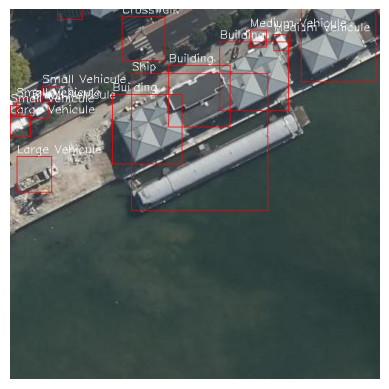

In [73]:
img=plot(train_bis_img_loc,indice)
img=reconnaissance_classes(train_bis_label_loc,indice,img)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()